#  Karlo Kegljevic analiza haljina

## 1. Kontrola kvalitete podataka

### Prepoznavanje nedostajucih vrijednosti

In [1]:
import pandas as pd
dresses = pd.read_csv("./dataset/Attribute_DataSet.csv")
dresses[dresses.isnull().any(axis=1)]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
5,1068332458,bohemian,Low,0.0,M,Summer,v-neck,sleevless,empire,NaN,NaN,NaN,print,0
6,1220707172,Casual,Average,0.0,XL,Summer,o-neck,full,NaN,cotton,NaN,NaN,solid,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,859922576,cute,Average,4.6,M,Spring,o-neck,halfsleeve,natural,acrylic,chiffon,NaN,NaN,0
494,990559192,Brief,Average,4.7,M,winter,o-neck,halfsleeve,natural,acrylic,chiffon,NaN,striped,0
495,713391965,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid,1
496,722565148,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,NaN,NaN,0


### Rekodiranje nedostajucih vrijednosti npr .null -> "missing"

Kao sto mozemo vidjeti imamo jako puno redova koje u sebi imaju NaN.
Iz tablice iznad takoder vidimo da je zapravo vecina NaN vrijednosti "dekoracija", 
mozemo izmijeniti dekoraciju iz NaN u "no_decoration" radi lakse analize


In [2]:
dresses["Decoration"] = dresses["Decoration"].fillna("no_decoration")
# ponovnim pokretanjem naredbe mozemo vidjeti manji broj nedostajucih redova s nan vrijednostima
dresses[dresses.isnull().any(axis=1)]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,no_decoration,print,0
5,1068332458,bohemian,Low,0.0,M,Summer,v-neck,sleevless,empire,NaN,NaN,no_decoration,print,0
6,1220707172,Casual,Average,0.0,XL,Summer,o-neck,full,NaN,cotton,NaN,no_decoration,solid,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,964917582,Casual,Average,5.0,L,Summer,o-neck,sleevless,natural,cotton,NaN,no_decoration,NaN,1
492,859922576,cute,Average,4.6,M,Spring,o-neck,halfsleeve,natural,acrylic,chiffon,no_decoration,NaN,0
495,713391965,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,no_decoration,solid,1
496,722565148,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,no_decoration,NaN,0


ponovnim pogledom na tablicu iznac mozemo primjetiti da su sada dominantni FabricType i PatternType u NaN
 promijeniti u "missing"

In [3]:
dresses["FabricType"]  = dresses["FabricType"].fillna("missing")
dresses["Pattern Type"] = dresses["Pattern Type"].fillna("missing")

# nakon rekodiranja fabrictype-a i patterntype-a nasa tablica sada ima jos manji broj NaN vrijednosti
dresses[dresses.isnull().any(axis=1)]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
5,1068332458,bohemian,Low,0.0,M,Summer,v-neck,sleevless,empire,NaN,missing,no_decoration,print,0
6,1220707172,Casual,Average,0.0,XL,Summer,o-neck,full,NaN,cotton,missing,no_decoration,solid,0
11,898481530,Flare,Average,0.0,free,Spring,v-neck,short,NaN,nylon,missing,no_decoration,animal,0
12,957723897,sexy,Low,4.7,M,Winter,o-neck,threequarter,NaN,NaN,chiffon,lace,print,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,933413410,Casual,Average,4.8,M,Summer,o-neck,halfsleeve,NaN,NaN,missing,no_decoration,missing,0
470,1124754999,Sexy,Average,0.0,S,Summer,v-neck,sleevless,NaN,NaN,missing,no_decoration,missing,1
471,832949213,Casual,Low,4.4,free,Summer,o-neck,sleevless,NaN,NaN,missing,no_decoration,animal,0
473,929898500,work,Average,4.8,M,winter,turndowncollor,full,natural,NaN,missing,no_decoration,solid,0


Iz tablice sada mozemo vidjeti da su dominirajuci column-i waiseline i Material
Material mozemo staviti "missing" a waiseline idemo provjeriti koje su sve vrijednosti osim NaN

In [4]:
dresses["Material"] = dresses["Material"].fillna("missing")

In [5]:
waiseline = dresses["waiseline"]
waiseline_uniq = waiseline.drop_duplicates()
waiseline_uniq

0        empire
1       natural
6           NaN
283    princess
423     dropped
Name: waiseline, dtype: object

Mozemo vidjeti da postoje empire, natural, princess, dropped i NaN u nasoj kolekciji.
Istrazivanjem tipova haljina sam dosao do zakljucka da ovu NaN vrijednost mozemo takoder zamijeniti s missing, nije slucaj kao kod dekoracija gdje je haljina ili imala naziv dekoracije ili NaN(u slucaju da nema dekoraciju)

In [6]:
dresses["waiseline"] = dresses["waiseline"].fillna("missing")
# nakon ciscenja i ovin NaN vrijednosti idemo provijeriti ima li jos NaN vrijednosti u nasoj kolekciji
dresses[dresses.isnull().any(axis=1)]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
186,929797706,Casual,Low,0.0,free,NaN,o-neck,full,natural,cotton,missing,no_decoration,patchwork,0
262,662727740,party,NaN,4.8,free,Winter,o-neck,sleevless,empire,missing,missing,embroidary,missing,1
263,1090993173,party,NaN,4.5,L,Summer,NaN,full,missing,missing,missing,no_decoration,missing,1
270,751364623,party,Average,4.8,L,NaN,Sweetheart,sleevless,empire,missing,missing,pleat,missing,1
329,858212832,cute,Average,4.3,M,Summer,NaN,NaN,natural,cotton,chiffon,no_decoration,solid,0
384,855418066,Casual,Low,4.7,L,Summer,NaN,sleevless,missing,cotton,missing,no_decoration,solid,1
441,1055149353,Sexy,Low,0.0,free,winter,v-neck,NaN,dropped,cotton,missing,lace,missing,1


Sada postoji samo 7 redova koje u sebi imaju NaN vrijednosti.
Idemo provjeriti Season postoji li universal, jer haljine mogu biti za godisnja doba ili univerzalne koje pasu na bilo koje godisnje doba

In [7]:
season = dresses["Season"]
season_uniq = season.drop_duplicates()
season_uniq

0      Summer
2      Automn
3      Spring
12     Winter
16     spring
147    winter
186       NaN
250    summer
439    Autumn
Name: Season, dtype: object

Ovom tablicom mozemo vidjeti da nemamo univerzalnu haljinu, stoga NaN vrijednosti zamijenjujemo s universal
Takoder mozemo zamijetiti vrlo bitnu stvar: u kolekciji postoji summer/Summer, Winter/winter, Spring/spring i imamo Automn/Autumn, pravilno se pise Autumn pa cemo zamijeniti Automn a sto se tice velikih slova na pocetku, staviti cemo sve na velika slova

In [8]:
dresses["Season"] = dresses["Season"].fillna("universal")
dresses["Season"] = dresses["Season"].replace("Automn","Autumn")
dresses["Season"] = dresses["Season"].replace("spring","Spring")
dresses["Season"] = dresses["Season"].replace("winter","Winter")
dresses["Season"] = dresses["Season"].replace("summer","Summer")

# Provjera jesmo li dobro replace-ali
season = dresses["Season"]
season_uniq = season.drop_duplicates()
season_uniq

0         Summer
2         Autumn
3         Spring
12        Winter
186    universal
Name: Season, dtype: object

Dobili smo ocekivani output, idemo provjetiti jesmo li sada ocistili gotovo sve NaN-ove iz kolekcije

In [9]:
dresses[dresses.isnull().any(axis=1)]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
262,662727740,party,NaN,4.8,free,Winter,o-neck,sleevless,empire,missing,missing,embroidary,missing,1
263,1090993173,party,NaN,4.5,L,Summer,NaN,full,missing,missing,missing,no_decoration,missing,1
329,858212832,cute,Average,4.3,M,Summer,NaN,NaN,natural,cotton,chiffon,no_decoration,solid,0
384,855418066,Casual,Low,4.7,L,Summer,NaN,sleevless,missing,cotton,missing,no_decoration,solid,1
441,1055149353,Sexy,Low,0.0,free,Winter,v-neck,NaN,dropped,cotton,missing,lace,missing,1


Ostalo nam je jos samo 5 haljina, od kojih 4 nemaju fabricType, 3 ih nema patternType, 2 nemaju materijal, 2 nemaju cijenu itd.
Stoga cu droppati tih 5 uzoraka jer smatram da nisu bitni za daljnju analizu, iz ovih redaka nebi dobio znatno drugacije rezultate a uvelike ce mi olaksati analizu ostalih podataka

In [10]:
dresses = dresses.dropna()
dresses[dresses.isnull().any(axis=1)]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation


Ukoliko je iznad prazna tablica mozemo zakljuciti da smo ocistili sve NaN vrijednosti iz naseg dataseta i ovime zakljucujem pripremu podataka za analizu

Dodatno sam kasnije saznao da postoji low i Low, te high i High, Average i medium, napravit ćemo isto kao i za godisnja doba sve low pretvoriti u Low, sve high pretvoriti u High i sve average pretvoritit u medium. Također postoji s i small u size pa cu sve s pretvoriti u small. Rating ćemo isto promijeniti jer postoji 0 a pretpostavljam da to znači da su to unrated haljine.
Primjetio sam da postoji i sleevless/sleeveless, budući da se pravilno piše sleeveless to ćemo također izmijeniti


In [53]:
dresses['Price'] = dresses['Price'].replace('high', 'High')
dresses['Price'] = dresses['Price'].replace('low', 'Low')
dresses['Price'] = dresses['Price'].replace('Average', 'Medium')
dresses['Size'] = dresses['Size'].replace('s', 'small')
dresses['Size'] = dresses['Size'].replace('S', 'small')
dresses['Rating'] = dresses['Rating'].replace(0.0, 'unrated')
dresses['SleeveLength'] = dresses['SleeveLength'].replace('sleevless', 'sleeveless')
price = dresses["Price"]
price_uniq = price.drop_duplicates()
price_uniq



0           Low
2          High
3        Medium
79    very-high
Name: Price, dtype: object

### Prepoznavanje uniformnih ili nelogičnih distribucija

Nakon priprema podataka vrijeme je da se upoznamo s podacima uz pomoć grafova, za to ćemo koristiti matplotlib te njegovu pyplot klasu

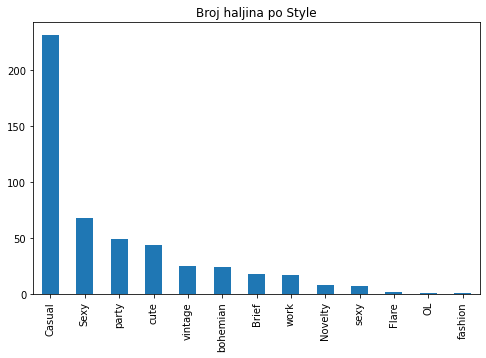

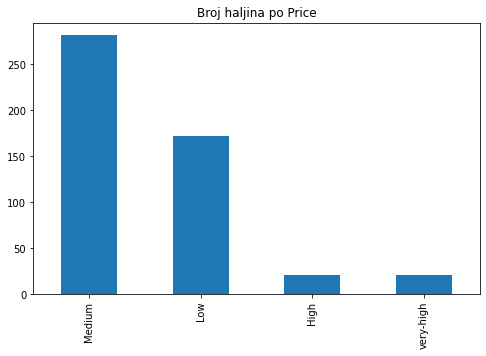

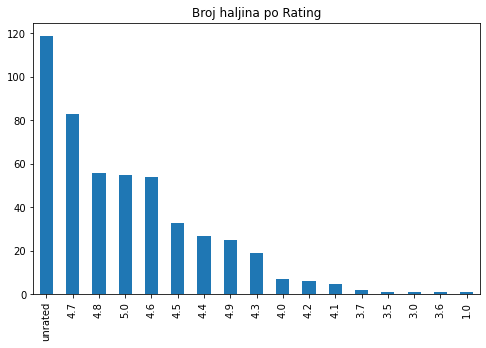

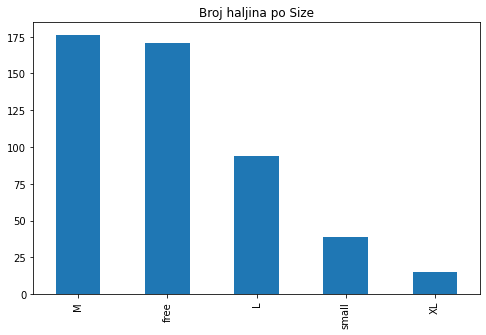

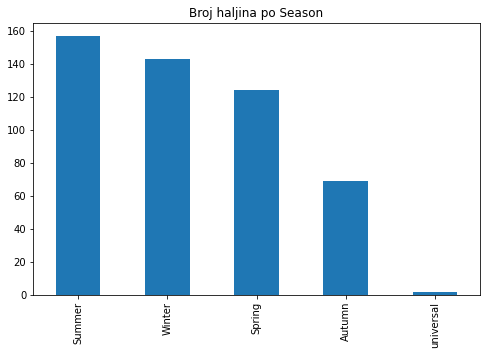

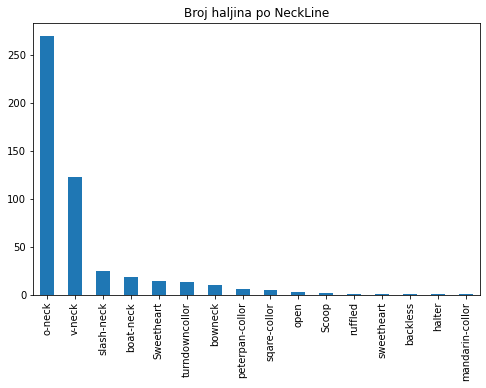

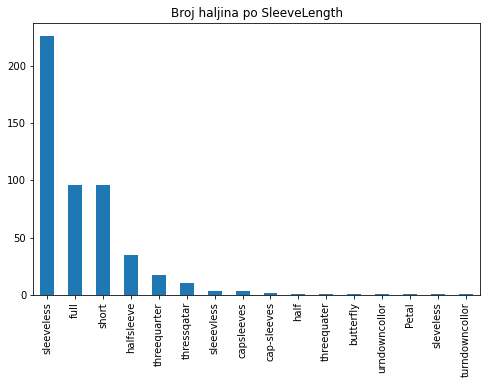

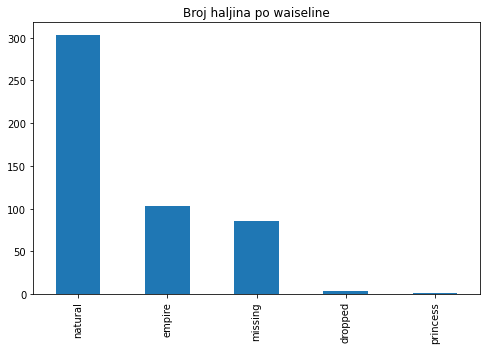

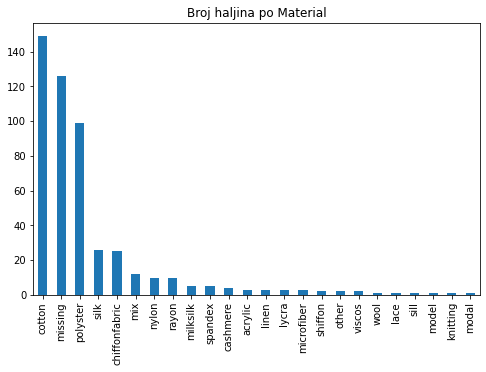

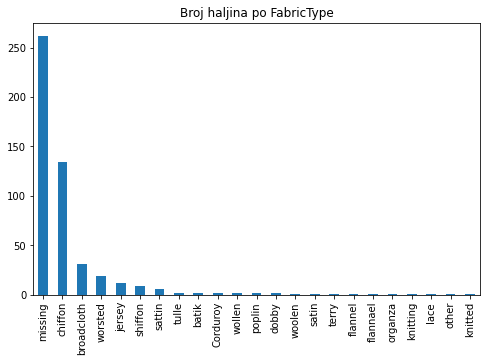

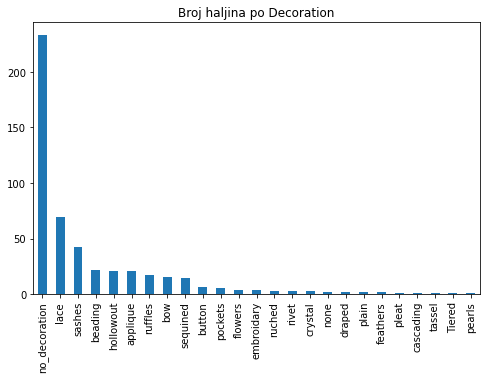

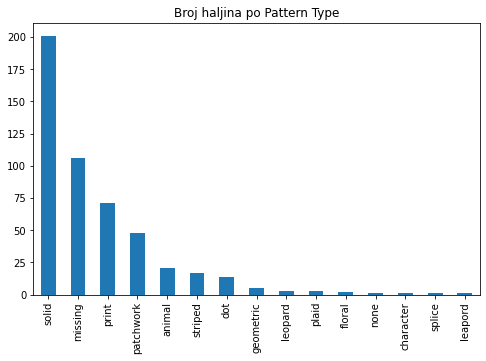

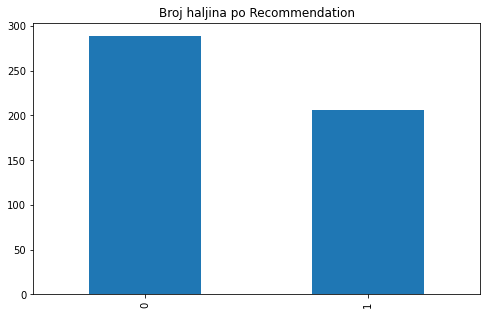

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import DataFrame

def draw_column_freq_plot(c,name):
    c.value_counts().plot(kind='bar', figsize=(8,5), title="Broj haljina po " + name)
    ax.set_xlabel(name)
    ax.set_ylabel("Frequency")
    plt.show()

for c in dresses.columns[1:]:  # preskacemo dress_ID
    draw_column_freq_plot(dresses[c],c)
    

Ovim grafovima došli smo do sljedećih zaključaka:

* Style: vidimo da je Casual najčešći stil haljine
* Price: srednja i niska cijena uvelike vode po broju haljina što je i za očekivati
* Rating: 

Kako bi imali još bolji uvid u naše podatke napraviti ćemo grafove koje prikazuju slično kao ovi prošli no frekvenciju ćemo razdvojiti i po recommendationu

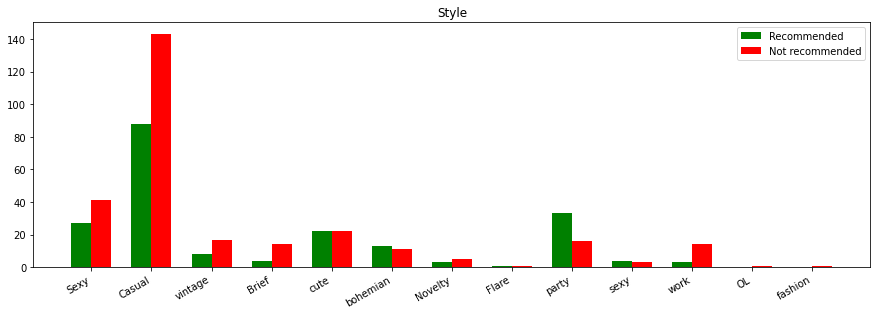

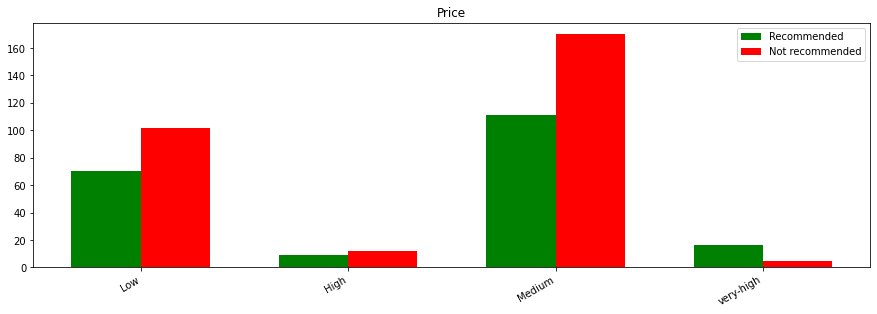

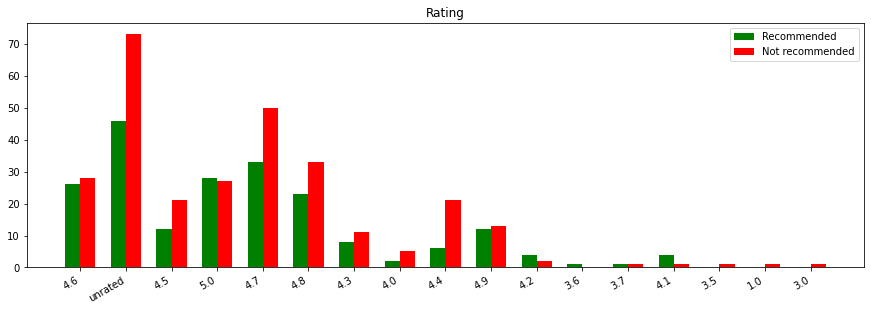

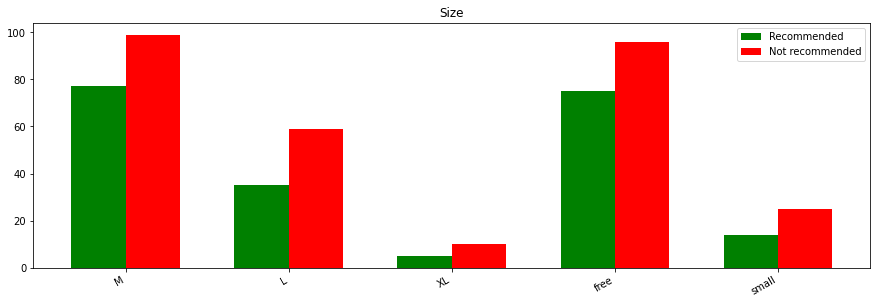

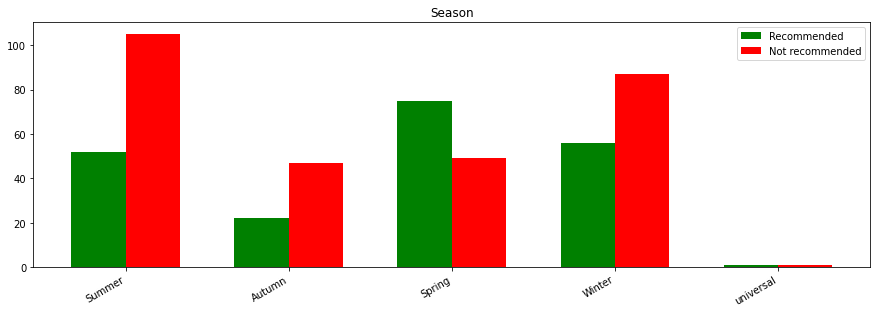

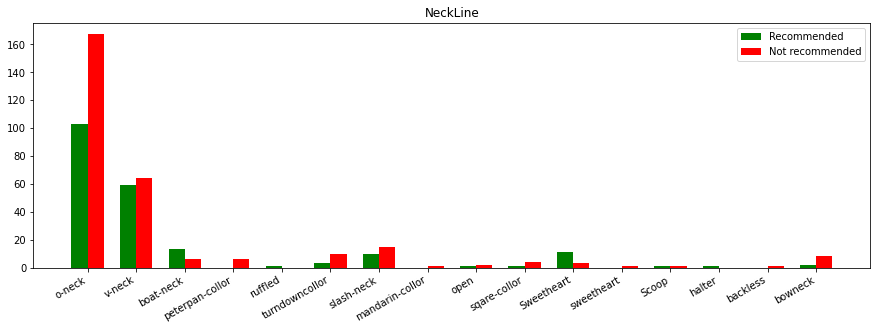

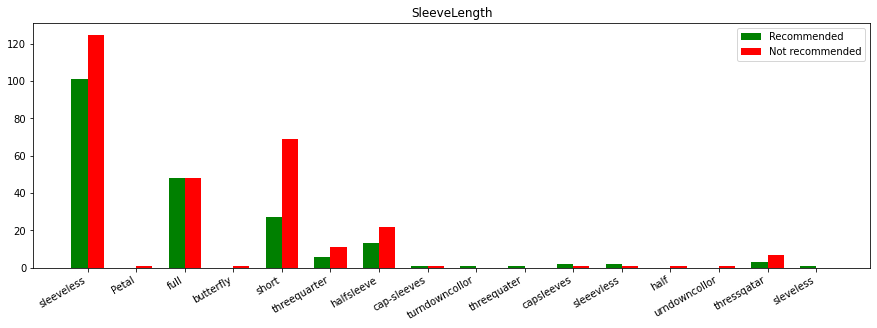

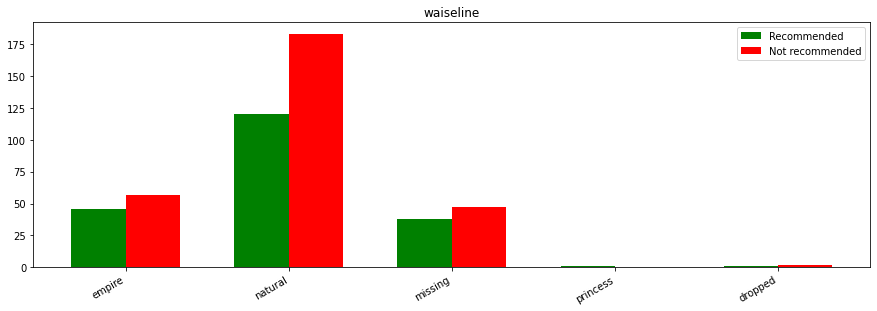

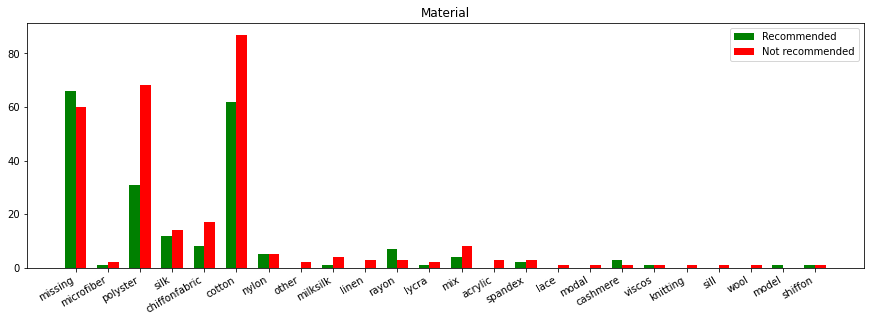

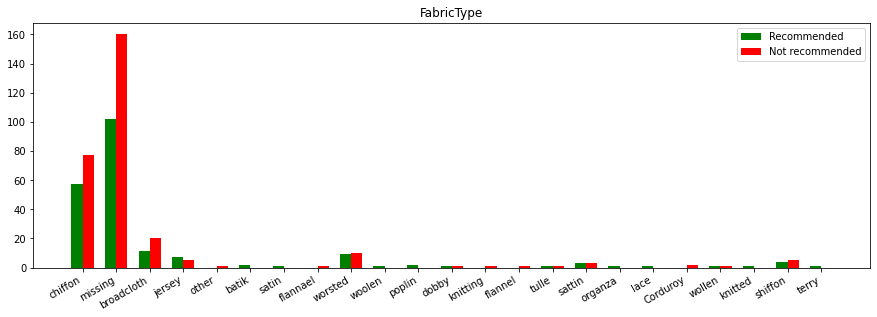

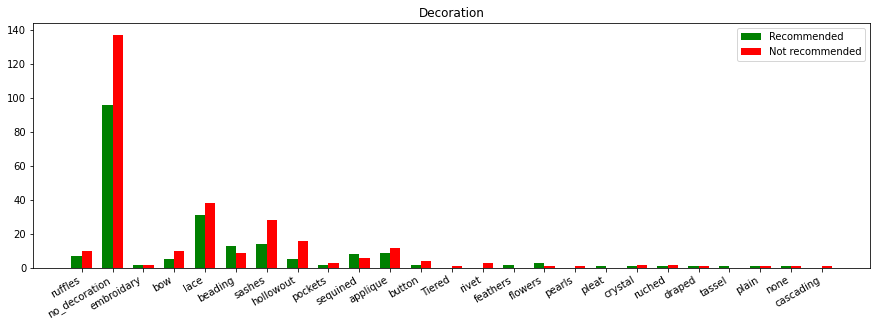

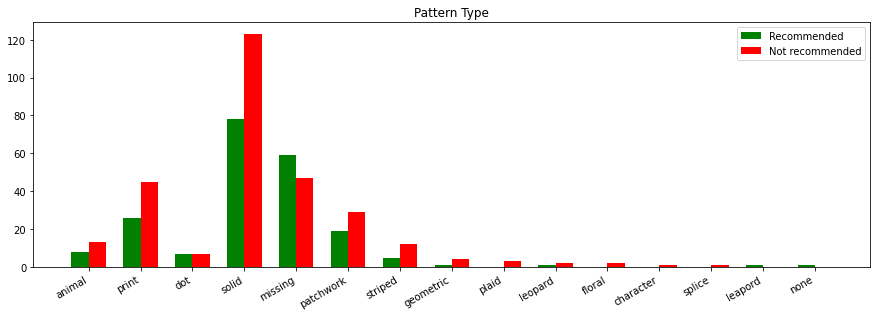

In [128]:
import numpy as np

for c in dresses.columns[1:-1]:  # preskacemo dress_ID i recommendation
    uniq = dresses[c].drop_duplicates()
    n_rec = []
    n_norec = []
    
    # get 2 bar values per each uniq string
    for u in uniq:
        n_rec.append(len(dresses[(dresses['Recommendation']==1) & (dresses[c]==u)]))
        n_norec.append(len(dresses[(dresses['Recommendation']==0) & (dresses[c]==u)]))
    
    indices = range(len(n_rec))
    # Calculate optimal width
    width = np.min(np.diff(indices))/3

    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    re = ax.bar(indices,n_rec,width,color='g',label='Recommended')
    unre = ax.bar(indices+width,n_norec,width,color='r',label='Not recommended')
    ax.legend((re[0],unre[0]),("Recommended","Not recommended"))
    ax.set_xticks(indices+width/2)
    fig.autofmt_xdate()
    ax.axes.set_xticklabels(uniq)
    ax.set_title(c)
    
    plt.show()
    

### Provjeriti / redizajnirati /odrediti ciljnu varijablu i njenu kvalitetu

## 2. Statističke analize uzorka podataka

### Za svaku kategoričku varijablu prikazati distribucija frekvencije u grafu 

In [7]:
# TODO

### Za svaku kontinuiranu varijablu izračunati srednju vrijednost, z vrijednosti, zaobljenost distribucije, nagnutost distribucije

In [8]:
# TODO

### Izračunati korelacije svake varijable sa ciljnom varijablom

In [9]:
# TODO

### Izračunati korelacije svake varijable izražene kroz Z vrijednost i  kategorizirane u razrede <-3 , (-3 do 3),>3 s ciljnom varijablom

In [10]:
# TODO

### Objasniti što ste spoznali vezano uz promatrani skup podataka  temeljem analiza iz točke 2

In [11]:
# TODO

## 3. IV, WoE izračuni

In [12]:
# TODO

### Izračunati IV, WoE za svaku varijablu i prikazati u Jupyter Notebooku

In [13]:
# TODO

### Izdvojiti varijable sa najjačim IV-om i prikazati grafički WoE graf za sve najjače varijable

In [14]:
# TODO

### Grupirati razrede po kriteriju WoE za najjače varijable

In [15]:
# TODO

### Objasniti što ste spoznali temeljem ove analize (profili, uzroci, uzročno posljedične veze)

In [16]:
# TODO

### Predložite kako biste riješili problem vezano uz vaš skup podataka temeljem  IV, WoE analize (što bi trebalo mijenjati, raditi drugačije, gdje je problem uzrok problema, koji su rizični profili … )

In [17]:
# TODO